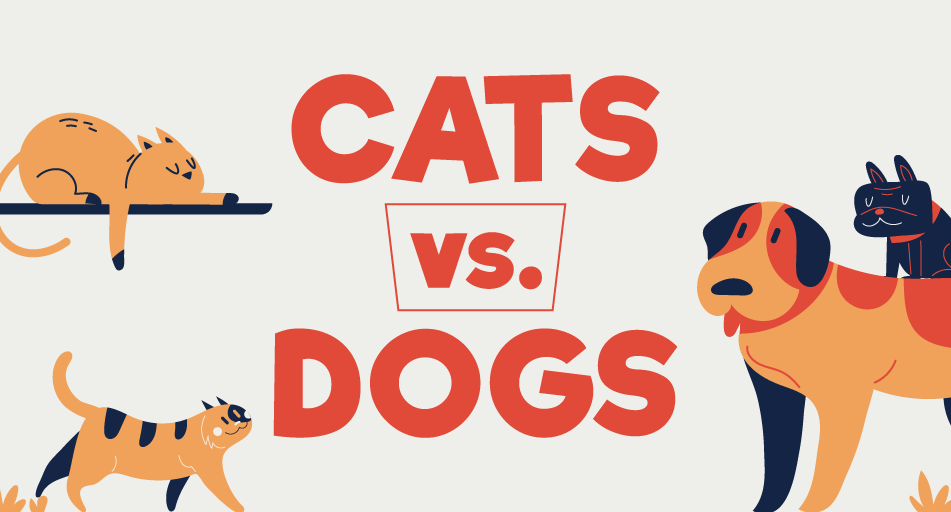

In [1]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import cv2 

# Models
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Data Splitting
from sklearn.model_selection import train_test_split

# Scailing
from sklearn.preprocessing import StandardScaler

Before we start with data visualization and modelling, we will create from the images we have the data frame that we will work with.<br>
<br>
To this end, we will define new functions that will help us read the images, resize them, change their colors to grayscale, and adjust them to the correct label of a dog or a cat.<br>
<br>
Using OpenCV library we'll read the images by their file path, resize them (to 64 by 64), and change their colors to grayscale.<br>
These operations will be performed in the following function.

In [4]:
def readImg_convert2gray_resize(file_path):
    img = cv2.imread(file_path)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized_img = cv2.resize(gray_img, (64,64))
    return resized_img

The next function will run on all the pictures of the cats and all the pictures of the dogs and use the previous function to arrange the pictures correctly in an array and add the corresponding label value to a separate array.

In [5]:
def img2array_addLabel(name, label):    
    numberOfImages=12500
    imgSize = 64*64
    X = np.ndarray((numberOfImages,imgSize), dtype=np.uint8)
    y = np.zeros((numberOfImages,1))
    folder = 'C:/Users/97254/Desktop/dogsVScats_train/train/'
    for i in range(numberOfImages):
        img = readImg_convert2gray_resize(folder + name + '.' + str(i) + '.jpg')
        X[i,:] = np.squeeze(img.reshape((imgSize,1)))
        y[i,0] = label
    return X,y

Once we have defined the new functions we can use them to load our data and turn it into a data frame that we can work with.

# Data Loading

### CATS

In [6]:
X1,y1 = img2array_addLabel('cat',0)
cat_df = pd.DataFrame(X1)
cat_df.shape

(12500, 4096)

In [7]:
cat_df['label'] = y1 # adding a column that expresses the label

### DOGS

In [8]:
X2,y2 = img2array_addLabel('dog',1)
dog_df = pd.DataFrame(X2)
dog_df.shape

(12500, 4096)

In [9]:
dog_df['label'] = y2 # adding a column that expresses the label